In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [18]:
data = pd.read_csv("back_order.csv")

In [19]:
data.head(5)

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9688 non-null   int64  
 1   sku                9688 non-null   int64  
 2   national_inv       9688 non-null   float64
 3   lead_time          8473 non-null   float64
 4   in_transit_qty     9688 non-null   float64
 5   forecast_3_month   9688 non-null   float64
 6   forecast_6_month   9688 non-null   float64
 7   forecast_9_month   9688 non-null   float64
 8   sales_1_month      9688 non-null   float64
 9   sales_3_month      9688 non-null   float64
 10  sales_6_month      9688 non-null   float64
 11  sales_9_month      9688 non-null   float64
 12  min_bank           9688 non-null   float64
 13  potential_issue    9688 non-null   object 
 14  pieces_past_due    9688 non-null   float64
 15  perf_6_month_avg   9688 non-null   float64
 16  perf_12_month_avg  9688 

In [21]:
#checking how many unique values are in columns
for col in data.columns:
    print(len(data[col].unique()))

9688
9688
1096
25
472
990
1246
1421
609
1008
1317
1501
581
2
290
101
102
90
2
2
2
2
2
2


In [22]:
str_col = ["potential_issue","deck_risk","oe_constraint","ppap_risk","stop_auto_buy","rev_stop","went_on_backorder"]

In [23]:
for col in str_col:
    print(data[col].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


In [24]:
#encoding categorical values
for col in str_col:
    data[col] = data[col].map({"Yes" : 0, "No" : 1})

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9688 non-null   int64  
 1   sku                9688 non-null   int64  
 2   national_inv       9688 non-null   float64
 3   lead_time          8473 non-null   float64
 4   in_transit_qty     9688 non-null   float64
 5   forecast_3_month   9688 non-null   float64
 6   forecast_6_month   9688 non-null   float64
 7   forecast_9_month   9688 non-null   float64
 8   sales_1_month      9688 non-null   float64
 9   sales_3_month      9688 non-null   float64
 10  sales_6_month      9688 non-null   float64
 11  sales_9_month      9688 non-null   float64
 12  min_bank           9688 non-null   float64
 13  potential_issue    9688 non-null   int64  
 14  pieces_past_due    9688 non-null   float64
 15  perf_6_month_avg   9688 non-null   float64
 16  perf_12_month_avg  9688 

In [26]:
data['went_on_backorder'].unique()

array([0, 1], dtype=int64)

In [27]:
data.describe(include="all")

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,9688.000000,9.688000e+03,9688.000000,8473.000000,9688.000000,9.688000e+03,9.688000e+03,9.688000e+03,9688.000000,9.688000e+03,...,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000
mean,4843.500000,3.404617e+06,353.050268,7.081199,52.626755,4.749449e+02,8.732313e+02,1.256470e+03,108.548617,3.651058e+02,...,37.424030,-14.037845,-13.718961,1.677230,0.805223,0.999690,0.873348,0.045314,0.998865,0.722543
std,2796.829038,6.930942e+04,4778.743675,5.755444,615.876767,1.108316e+04,2.247367e+04,3.362884e+04,3140.316576,1.132033e+04,...,886.372272,35.430540,35.111369,35.268733,0.396049,0.017595,0.332599,0.208002,0.033679,0.447767
min,0.000000,3.284951e+06,-2567.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2421.750000,3.344886e+06,2.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.370000,0.410000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,4843.500000,3.403785e+06,9.000000,8.000000,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.000000,3.000000e+00,...,0.000000,0.730000,0.780000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,7265.250000,3.464248e+06,60.000000,8.000000,0.000000,4.000000e+01,7.500000e+01,1.080000e+02,10.000000,3.400000e+01,...,0.000000,0.930000,0.910000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,9687.000000,3.526994e+06,389335.000000,52.000000,36334.000000,1.021940e+06,2.094452e+06,3.162260e+06,299190.000000,1.086554e+06,...,79964.000000,1.000000,1.000000,2837.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data.isna().sum()

Unnamed: 0              0
sku                     0
national_inv            0
lead_time            1215
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [29]:
print(data.lead_time.isna().sum()/9688)

0.1254128819157721


lead_time has a lot of missing values. But as we watch closely, the NAs didn’t really signify a missing values, but it represent a lack of transit time. Therefore, we can impute/change the value by 0 (no transit time).

In [30]:
data = data.dropna()

In [31]:
data

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2,2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,...,0.0,0.70,0.73,0.0,1,1,1,0,1,0
3,3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,...,0.0,0.70,0.73,0.0,1,1,1,0,1,0
4,4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,...,0.0,0.95,0.94,0.0,1,1,1,0,1,0
5,5,3316047,0.0,4.0,0.0,10.0,10.0,10.0,0.0,0.0,...,0.0,0.57,0.68,0.0,0,1,1,0,1,0
6,6,3317147,0.0,8.0,0.0,2.0,3.0,4.0,0.0,1.0,...,0.0,0.56,0.68,0.0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,9683,3450927,0.0,2.0,0.0,55.0,55.0,55.0,0.0,0.0,...,15.0,0.00,0.00,0.0,0,1,0,0,1,1
9684,9684,3318198,45.0,12.0,20.0,53.0,93.0,134.0,14.0,60.0,...,14.0,0.70,0.76,0.0,1,1,1,0,1,1
9685,9685,3446698,130.0,8.0,45.0,70.0,160.0,240.0,53.0,122.0,...,10.0,0.84,0.86,1.0,1,1,1,0,1,1
9686,9686,3443031,-7.0,8.0,0.0,45.0,68.0,95.0,13.0,35.0,...,3.0,0.50,0.46,7.0,1,1,1,0,1,1


In [32]:
data.isna().sum()

Unnamed: 0           0
sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [33]:
X = data.drop(["went_on_backorder","Unnamed: 0","sku"],axis=1)

In [34]:
y =data["went_on_backorder"]

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scalar = StandardScaler()

In [45]:
X_scaled = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

X_scaled

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-0.072887,-0.882903,-0.091009,-0.045406,-0.041172,-0.039675,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.045124,0.161039,0.150703,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
1,-0.071505,0.159650,-0.091009,-0.044815,-0.040339,-0.038562,-0.036193,-0.034166,-0.034641,-0.034165,...,0.0392,-0.045124,0.161039,0.150703,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
2,-0.072887,0.159650,-0.091009,-0.044984,-0.040880,-0.039425,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.045124,0.176799,0.164959,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
3,-0.072887,-0.535385,-0.091009,-0.044900,-0.041047,-0.039592,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.045124,0.152844,0.147308,-0.050609,-2.314377,0.01882,0.375897,-0.164409,0.028755
4,-0.072887,0.159650,-0.091009,-0.045575,-0.041338,-0.039758,-0.036789,-0.034249,-0.034641,-0.034165,...,0.0392,-0.045124,0.152214,0.147308,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,-0.072887,-0.882903,-0.091009,-0.041102,-0.039174,-0.038340,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.029295,0.116911,0.101146,-0.050609,-2.314377,0.01882,-2.660304,-0.164409,0.028755
8469,-0.063998,0.854685,-0.060618,-0.041271,-0.037592,-0.036143,-0.032619,-0.029374,-0.029675,-0.029351,...,0.0392,-0.030351,0.161039,0.152739,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
8470,-0.047206,0.159650,-0.022629,-0.039836,-0.034804,-0.033194,-0.021003,-0.024251,-0.025898,-0.025456,...,0.0392,-0.034572,0.169865,0.159528,-0.024085,0.432082,0.01882,0.375897,-0.164409,0.028755
8471,-0.074270,0.159650,-0.091009,-0.041946,-0.038633,-0.037227,-0.032917,-0.031440,-0.031585,-0.031605,...,0.0392,-0.041958,0.148431,0.132373,0.135056,0.432082,0.01882,0.375897,-0.164409,0.028755


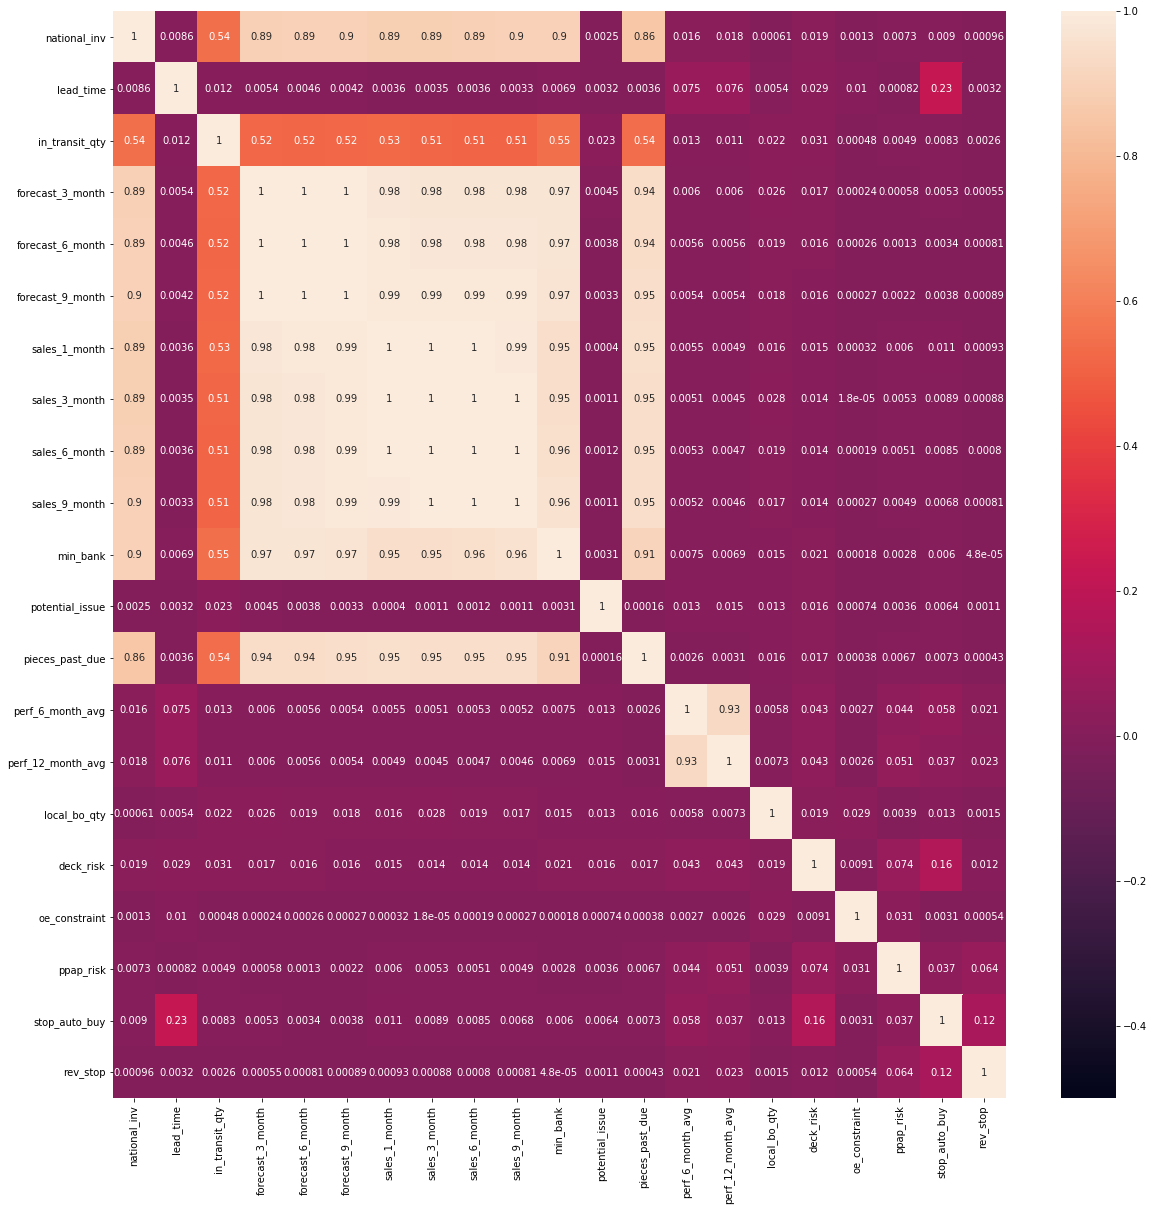

In [39]:
import seaborn as sns 
plot.figure(figsize=(20,20))
plt_data =X_scaled
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled.values

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [41]:
vif

,VIF,Features
0,5.940944,national_inv
1,1.066662,lead_time
2,1.792865,in_transit_qty
3,703.150833,forecast_3_month
4,7104.115768,forecast_6_month
5,5858.998007,forecast_9_month
6,364.018624,sales_1_month
7,2091.142745,sales_3_month
8,7578.390952,sales_6_month
9,4337.186397,sales_9_month


In [42]:
vif[vif["VIF"]>8].count()

VIF         9
Features    9
dtype: int64

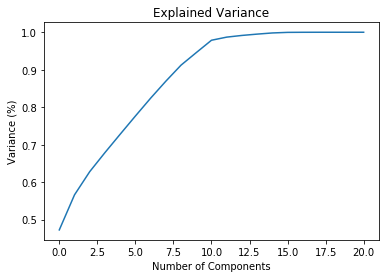

In [43]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plot.figure()
plot.plot(np.cumsum(pca.explained_variance_ratio_))
plot.xlabel('Number of Components')
plot.ylabel('Variance (%)') #for each component
plot.title('Explained Variance')
plot.show()

In [46]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [47]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.146977,-0.433022,-0.729319,0.056507,-0.099197,0.212689,-0.079751,-0.022828,0.420916,0.307728
1,-0.146852,-0.285817,-0.232759,-0.412961,0.087958,0.235365,-0.014221,-0.233929,-0.059117,-0.103373
2,-0.147840,-0.306471,-0.227972,-0.412696,0.087808,0.234931,-0.014490,-0.234026,-0.060151,-0.103843
3,-0.164588,-0.120601,0.521726,0.491420,-0.420062,-1.372481,0.297566,0.656711,1.497714,-0.503746
4,-0.148270,-0.277441,-0.234695,-0.413078,0.088067,0.235556,-0.014137,-0.233876,-0.058675,-0.102950
...,...,...,...,...,...,...,...,...,...,...
8468,-0.162045,0.138850,0.914047,2.650154,-0.995514,-1.413985,0.339698,1.430625,-0.343567,-0.232361
8469,-0.121873,-0.189372,0.097764,-0.725772,0.213683,0.250633,0.027651,-0.375335,-0.380151,-0.359985
8470,-0.090501,-0.298732,-0.231420,-0.411198,0.110433,0.240224,-0.020142,-0.219846,-0.060522,-0.065395
8471,-0.139416,-0.266298,-0.234515,-0.403865,0.231937,0.268687,-0.025890,-0.123103,-0.047756,-0.113183


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = principal_x.values

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = principal_x.columns

In [49]:
vif

,VIF,Features
0,1.0,PC-1
1,1.0,PC-2
2,1.0,PC-3
3,1.0,PC-4
4,1.0,PC-5
5,1.0,PC-6
6,1.0,PC-7
7,1.0,PC-8
8,1.0,PC-9
9,1.0,PC-10


#### Data ImBalance

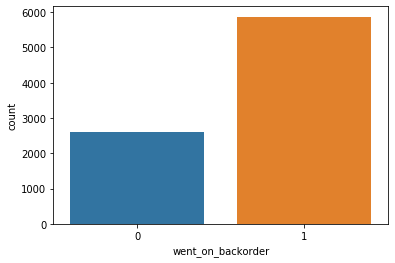

In [50]:
sns.countplot(y)

Looks fairly balanced. We can go ahead without handling the imbalance.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train,y_test = train_test_split(principal_x,y,test_size = 0.3)

In [53]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [54]:
rf = RandomForestClassifier()

In [55]:
lr = LogisticRegression()

In [56]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
rf.score(x_train,y_train)

0.9978081267914348

In [58]:
rf.score(x_test,y_test)

0.8060582218725413

In [59]:
pred = rf.predict(x_test)

In [62]:
(pred - y_test).unique()

array([ 0,  1, -1], dtype=int64)

In [65]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[ 510  253]
 [ 240 1539]]


In [66]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       763
           1       0.86      0.87      0.86      1779

    accuracy                           0.81      2542
   macro avg       0.77      0.77      0.77      2542
weighted avg       0.81      0.81      0.81      2542

